In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


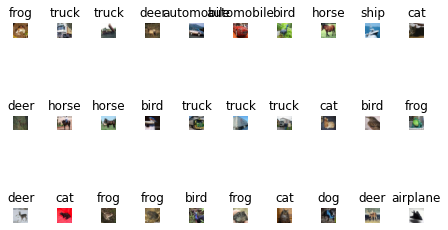

In [ ]:
import matplotlib.pyplot as plt

cifar10_labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

for index, img in enumerate(X_train[:30]):
  plt.subplot(3,10, index + 1)
  plt.imshow(img)
  plt.axis("off")
  plt.title(cifar10_labels[y_train[index][0]])
  plt.tight_layout()

plt.show()

In [ ]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255.
X_test /= 255.

In [ ]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.optimizers import Adam

from keras.layers.core import Dense,Activation,Dropout,Flatten
from tensorflow.python.keras.callbacks import TensorBoard

model=Sequential()
model.add(Conv2D(32,(3,3),padding="same",input_shape=(32,32,3)))
model.add(Activation("relu"))
model.add(Conv2D(32,(3,3),padding="same"))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

tsb = TensorBoard(log_dir="./logs")

history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_split=0.2,
    callbacks=[tsb]
)


Epoch 1/20
   1/1250 [..............................] - ETA: 0s - loss: 2.3829 - accuracy: 0.0312WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4823 - accuracy: 0.4659 - val_loss: 1.1552 - val_accuracy: 0.5986
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1199 - accuracy: 0.6025 - val_loss: 1.0012 - val_accuracy: 0.6521
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9645 - accuracy: 0.6598 - val_loss: 0.9588 - val_accuracy: 0.6641
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8493 - accuracy: 0.7000 - val_loss: 0.9044 - val_accuracy: 0.6825
Epoch 5/20
1250/1250 [==============================] - 6s 5

In [ ]:
model.save("/content/drive/My Drive/Colab Notebooks/model.h5")

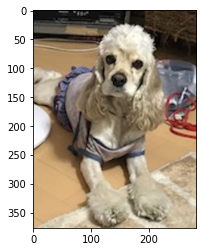

In [ ]:
from PIL import Image
import matplotlib.image as mping
input = Image.open("/content/drive/My Drive/dog1.jpg")
plt.imshow(input)


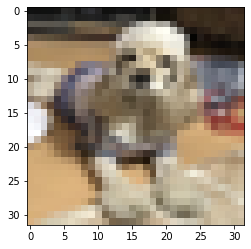

In [ ]:
input = input.resize((32,32))
plt.imshow(input)

In [ ]:
import numpy as np
X = np.array(input)
X = X.astype("float32")
X /= 255.
X = X.reshape(1,32,32,3)
print(X.shape)

(1, 32, 32, 3)


In [ ]:
y = model.predict(X)
print(y)
max = np.argmax(y)
print(max)
label = cifar10_labels[max]
print(label)

[[5.8735429e-07 3.0837695e-05 7.2866278e-03 4.0383831e-02 2.3194472e-03
  9.3430197e-01 1.3389596e-02 2.2806029e-03 1.2798056e-06 5.2058067e-06]]
5
dog
